# 第七章　給湯設備 / Chapter 7 Hot water supply system

## 第一節　給湯設備 / Section 1 Hot water supply system

In [1]:
import numpy as np

# 試算例

### 初期条件

In [2]:
def get_default_hot_water_demand():

  base = {'region' : 6, 'sol_region' : None, 'A_A' : 120, 'L_HWH' : None, 'heating_flag_d' : None}

  HW = {'hw_type' : 'ガス従来型給湯機', 'e_rtd' : 0.704, 'e_dash_rtd' : None, 'hybrid_category' : None,
        'bath_function' : 'ふろ給湯機(追焚あり)', 'has_bath' : True, 'pipe_diameter' : '上記以外',
        'kitchen_watersaving_A' : False, 'kitchen_watersaving_C' : False,  'shower_watersaving_A' : False,
        'shower_watersaving_B' : False, 'washbowl_watersaving_C' : False, 'bath_insulation' : False}

  return base, HW

### 計算

In [3]:
def calc_results(base, HW):

  from pyhees.section2_1_c import get_n_p
  from pyhees.section2_1_b import get_f_prim
  from pyhees.section7_1 import calc_E_E_W_d_t, calc_E_G_W_d_t, calc_E_K_W_d_t

  L_HWH = base['L_HWH']
  region = base['region']
  sol_region = base['sol_region']
  heating_flag_d = base['heating_flag_d']
  A_A = base['A_A']
  n_p = get_n_p(A_A)
  SHC = None

  temp_E = calc_E_E_W_d_t(n_p, L_HWH, heating_flag_d, region, sol_region, HW, SHC)
  temp_G = calc_E_G_W_d_t(n_p, L_HWH, heating_flag_d, A_A, region, sol_region, HW, SHC)
  temp_K = calc_E_K_W_d_t(n_p, L_HWH, heating_flag_d, A_A, region, sol_region, HW, SHC)

  f_prim = get_f_prim()
  Ene_TOTAL = temp_E * f_prim / 1000 + temp_G + temp_K

  print('給湯用一次エネルギー消費量 = {}MJ/年'.format(np.sum(Ene_TOTAL)))

  return {'Ene_TOTAL': Ene_TOTAL}

In [4]:
def get_each_graph(_results):

    import matplotlib.pyplot as plt
    
    results_sum_day = np.sum(_results.reshape(365,24), axis = 1)
    results_mean_hour = np.mean(_results.reshape(365,24), axis = 0)

    fig = plt.figure(figsize = (20,12))
    grh1 = fig.add_subplot(311)
    grh1.set_ylabel('MJ/h')
    grh1.set_xlabel('hour')
    grh1.plot(_results)

    grh_day = fig.add_subplot(312)
    grh_day.set_ylabel('MJ/d')
    grh_day.set_xlabel('day')
    grh_day.plot(results_sum_day)

    grh_hour = fig.add_subplot(313)
    grh_hour.plot(results_mean_hour)
    grh_hour.set_ylabel('MJ/h')
    grh_hour.set_xlabel('hour')

    plt.show()


### 計算条件1

初期条件での計算

In [5]:
base, HW = get_default_hot_water_demand()

E_W_d_t_1 = calc_results(base, HW)['Ene_TOTAL']

L_ba = 1339.0568333333335
W_k = 35806.0
W_s = 58690.0
W_w = 9454.0
W_b1 = 0.0
W_b2 = 60300.0
W_ba1 = 0.0
W_dash_k = 35806.0
W_dash_s = 58690.0
W_dash_w = 9454.0
W_dash_b1 = 0.0
W_dash_b2 = 60300.0
W_dash_ba1 = 0.0
L_dash_k = 3622.896051970286
L_dash_s = 5940.34804910638
L_dash_w = 957.2672611235673
L_dash_b1 = 0.0
L_dash_b2 = 6097.813467345601
L_dash_ba1 = 0.0
L_dash_ba2 = 1673.8210416666666
L_dashdash_k = 3622.896051970286
L_dashdash_s = 5940.34804910638
L_dashdash_w = 957.2672611235673
L_dashdash_b1 = 0.0
L_dashdash_b2 = 6097.813467345601
L_dashdash_ba1 = 0.0
L_dashdash_ba2 = 1673.8210416666666
E_E_hs_aux1 = 37.22433263888889
E_E_hs_aux2 = 6.513888888888888
E_E_hs_aux3 = 13.686551818865741
給湯用一次エネルギー消費量 = 27637.31547105188MJ/年


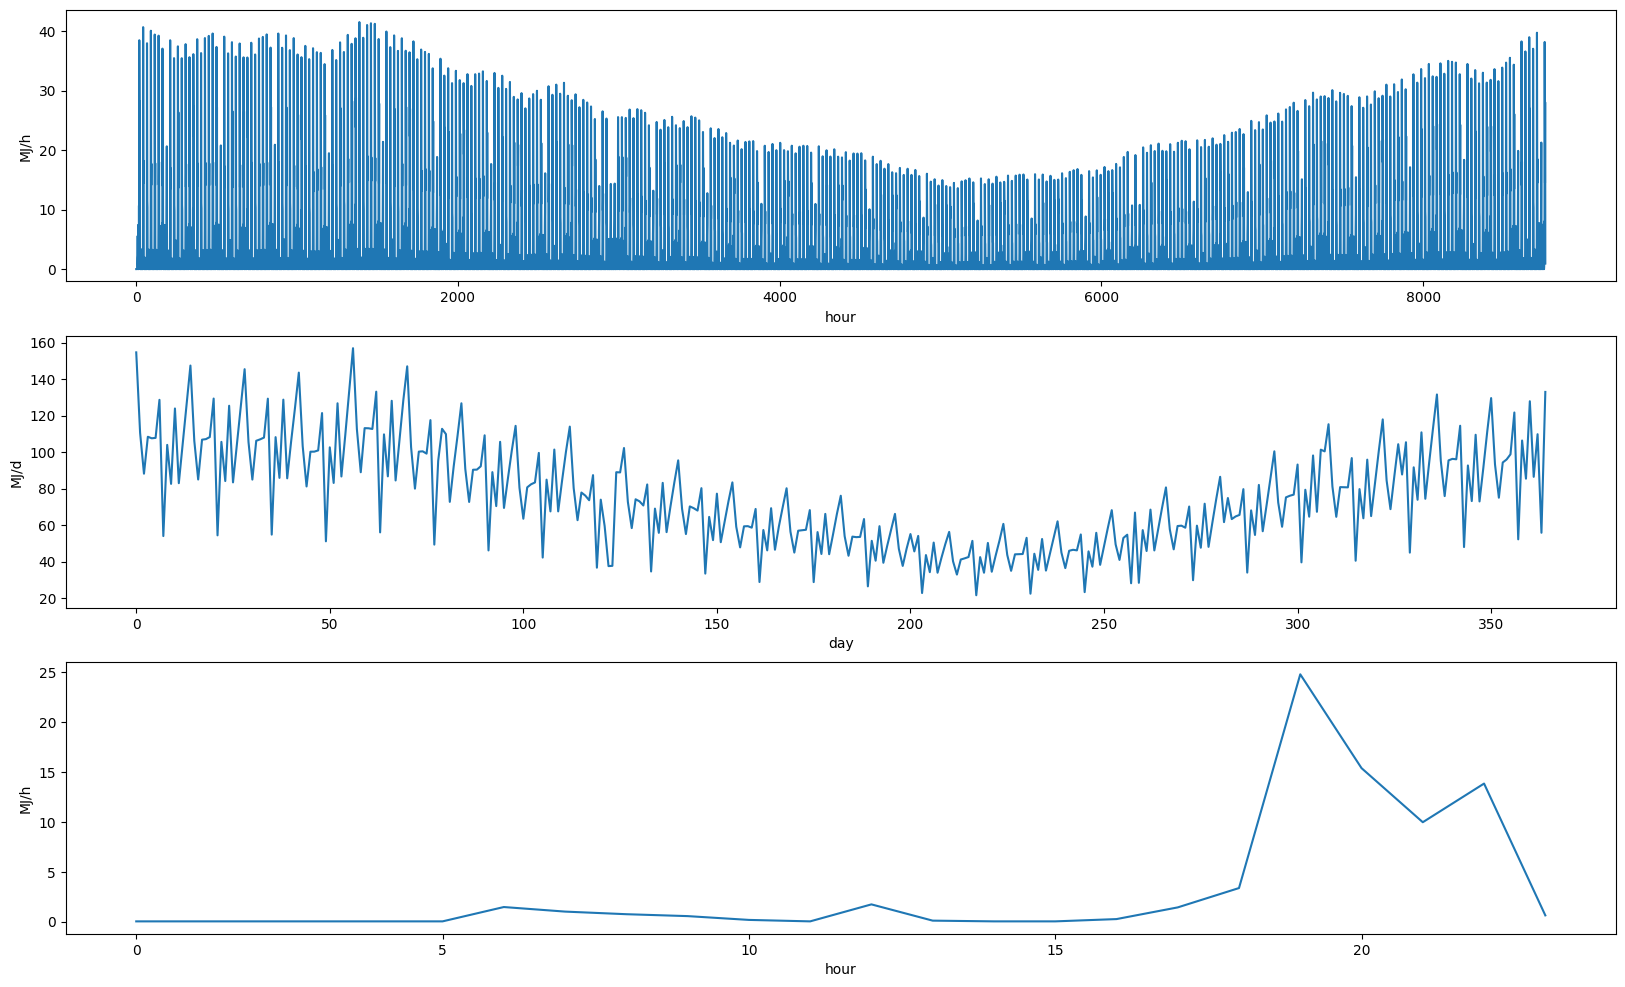

In [6]:
get_each_graph(E_W_d_t_1)

### 計算条件2

- エネルギー消費効率70.4％に変更

In [7]:
base, HW = get_default_hot_water_demand()
HW['e_rtd'] = None
HW['e_dash_rtd'] = 0.704

E_W_d_t_2 = calc_results(base, HW)['Ene_TOTAL']

E_E_hs_aux1 = 37.22433263888889
E_E_hs_aux2 = 6.513888888888888
E_E_hs_aux3 = 13.686551818865741
給湯用一次エネルギー消費量 = 30083.074560219025MJ/年


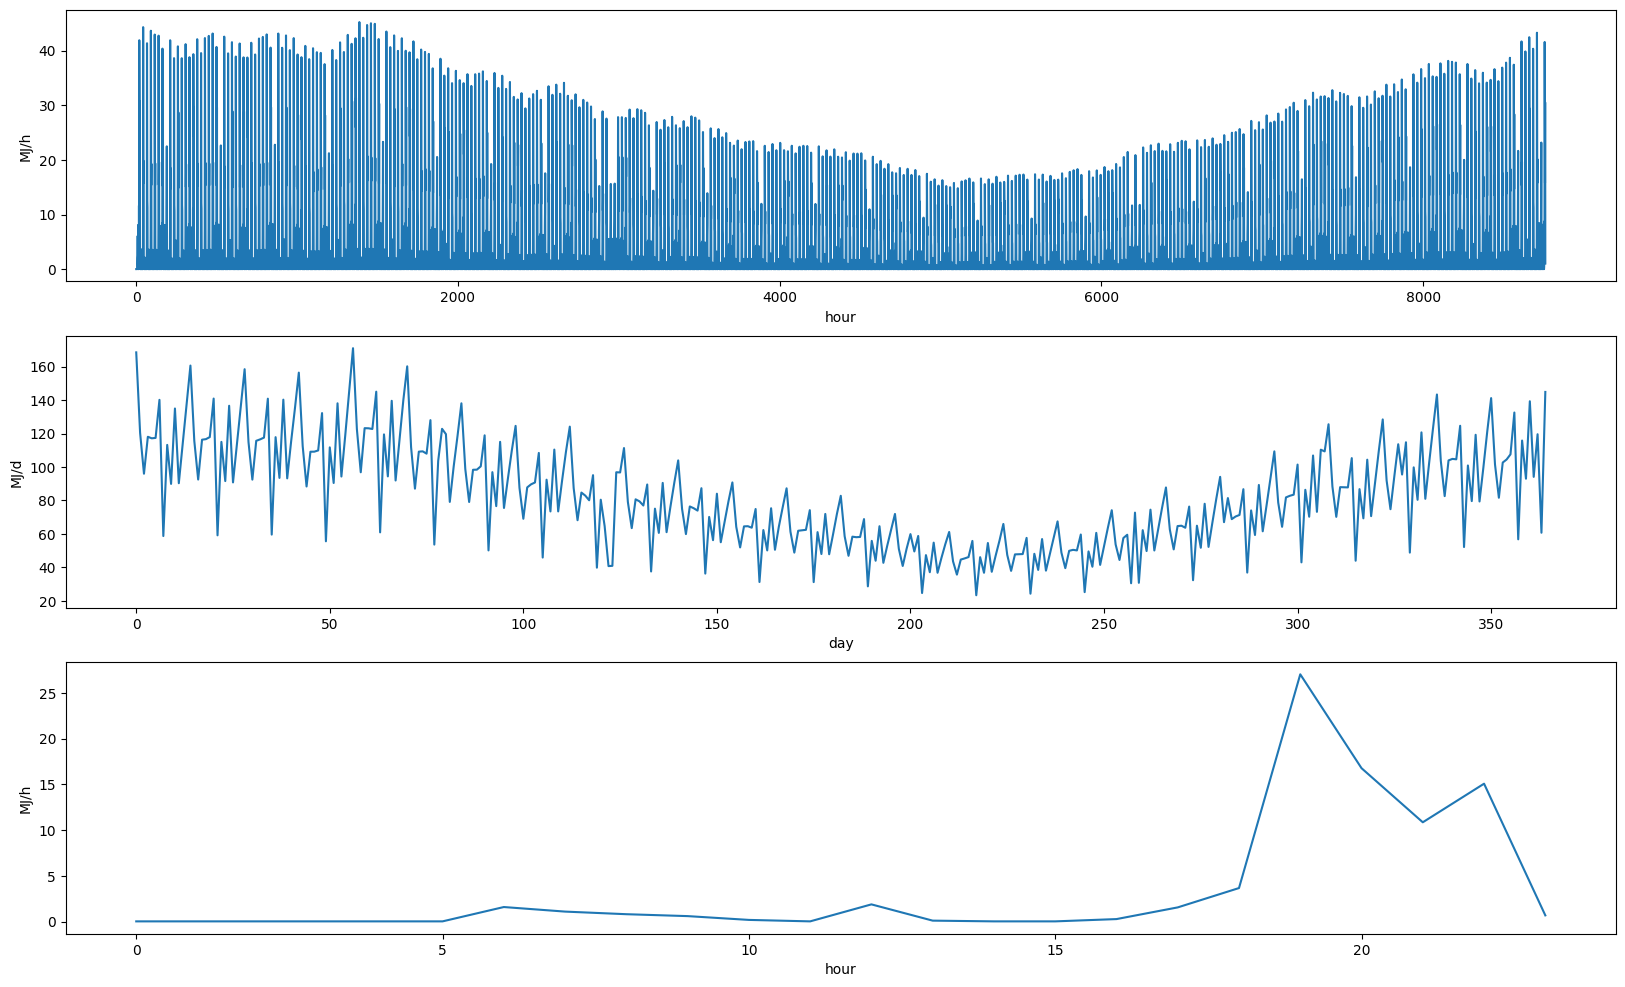

In [8]:
get_each_graph(E_W_d_t_2)

### 計算条件3

- ガス潜熱回収型給湯機（効率83.6%）に変更

In [9]:
base, HW = get_default_hot_water_demand()
HW['hw_type'] = 'ガス潜熱回収型給湯機'
HW['e_rtd'] = 0.836

E_W_d_t_3 = calc_results(base, HW)['Ene_TOTAL']

E_E_hs_aux1 = 37.22433263888889
E_E_hs_aux2 = 6.513888888888888
E_E_hs_aux3 = 13.686551818865741
給湯用一次エネルギー消費量 = 23685.97691330349MJ/年


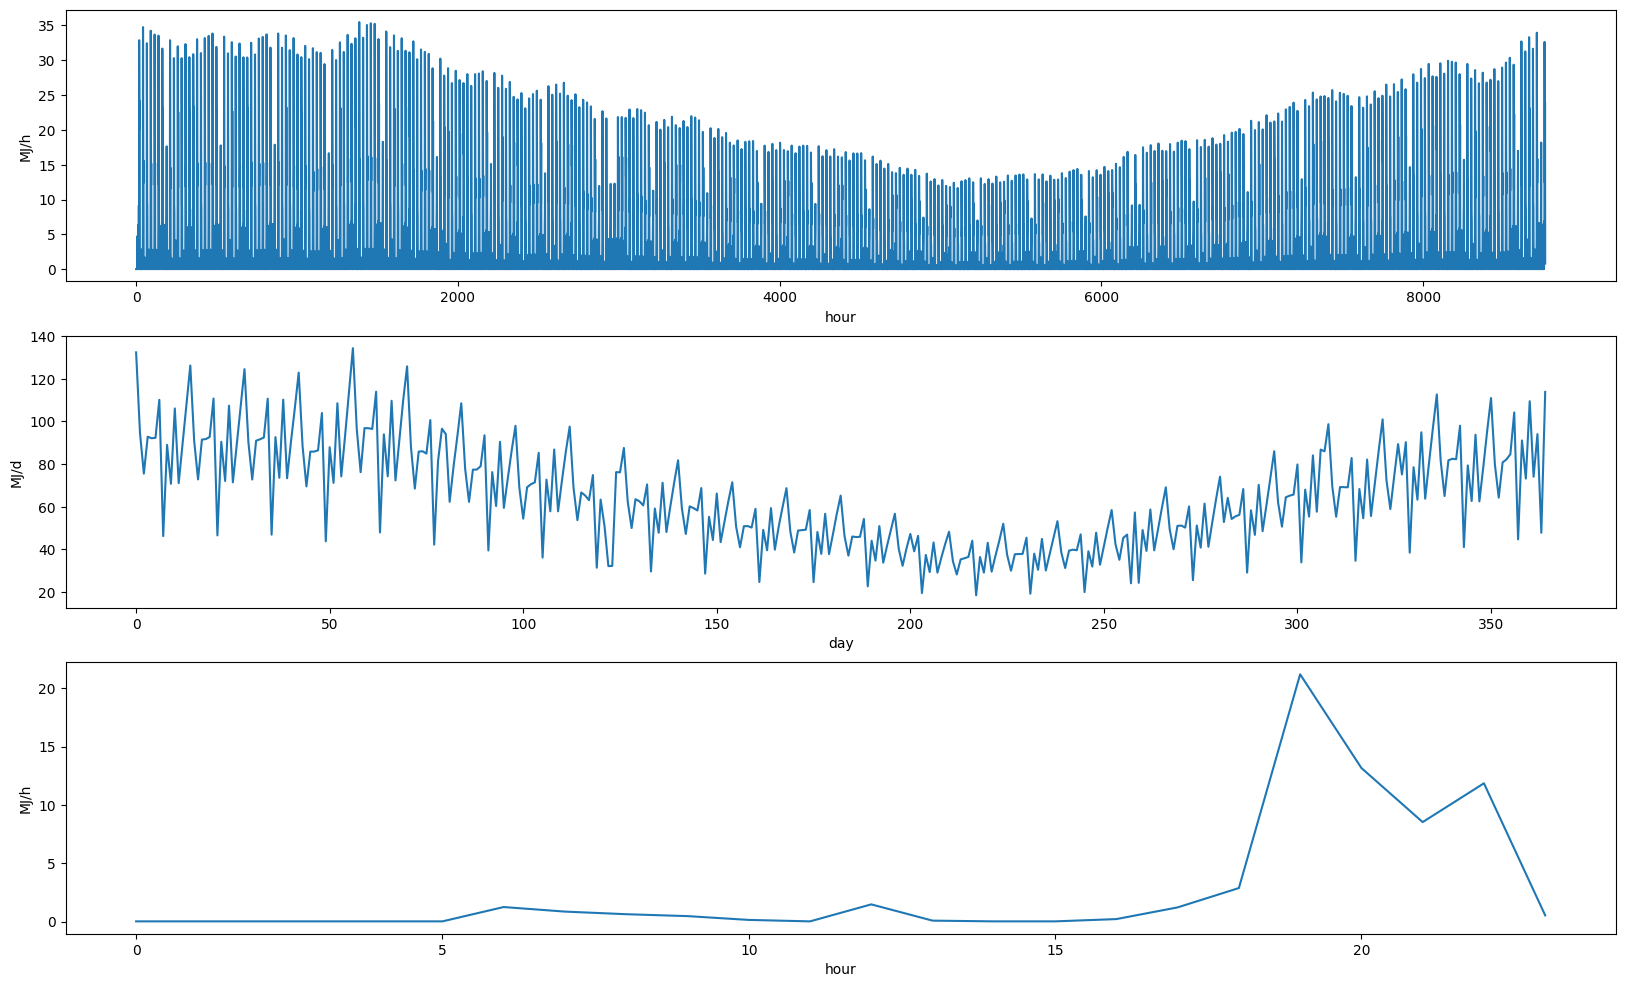

In [10]:
get_each_graph(E_W_d_t_3)

### 計算条件4

- 石油従来型給湯機（効率77.9%）に変更

In [11]:
base, HW = get_default_hot_water_demand()
HW['hw_type'] = '石油従来型給湯機'
HW['e_rtd'] = 0.779

E_W_d_t_4 = calc_results(base, HW)['Ene_TOTAL']

給湯用一次エネルギー消費量 = 24665.60200829768MJ/年


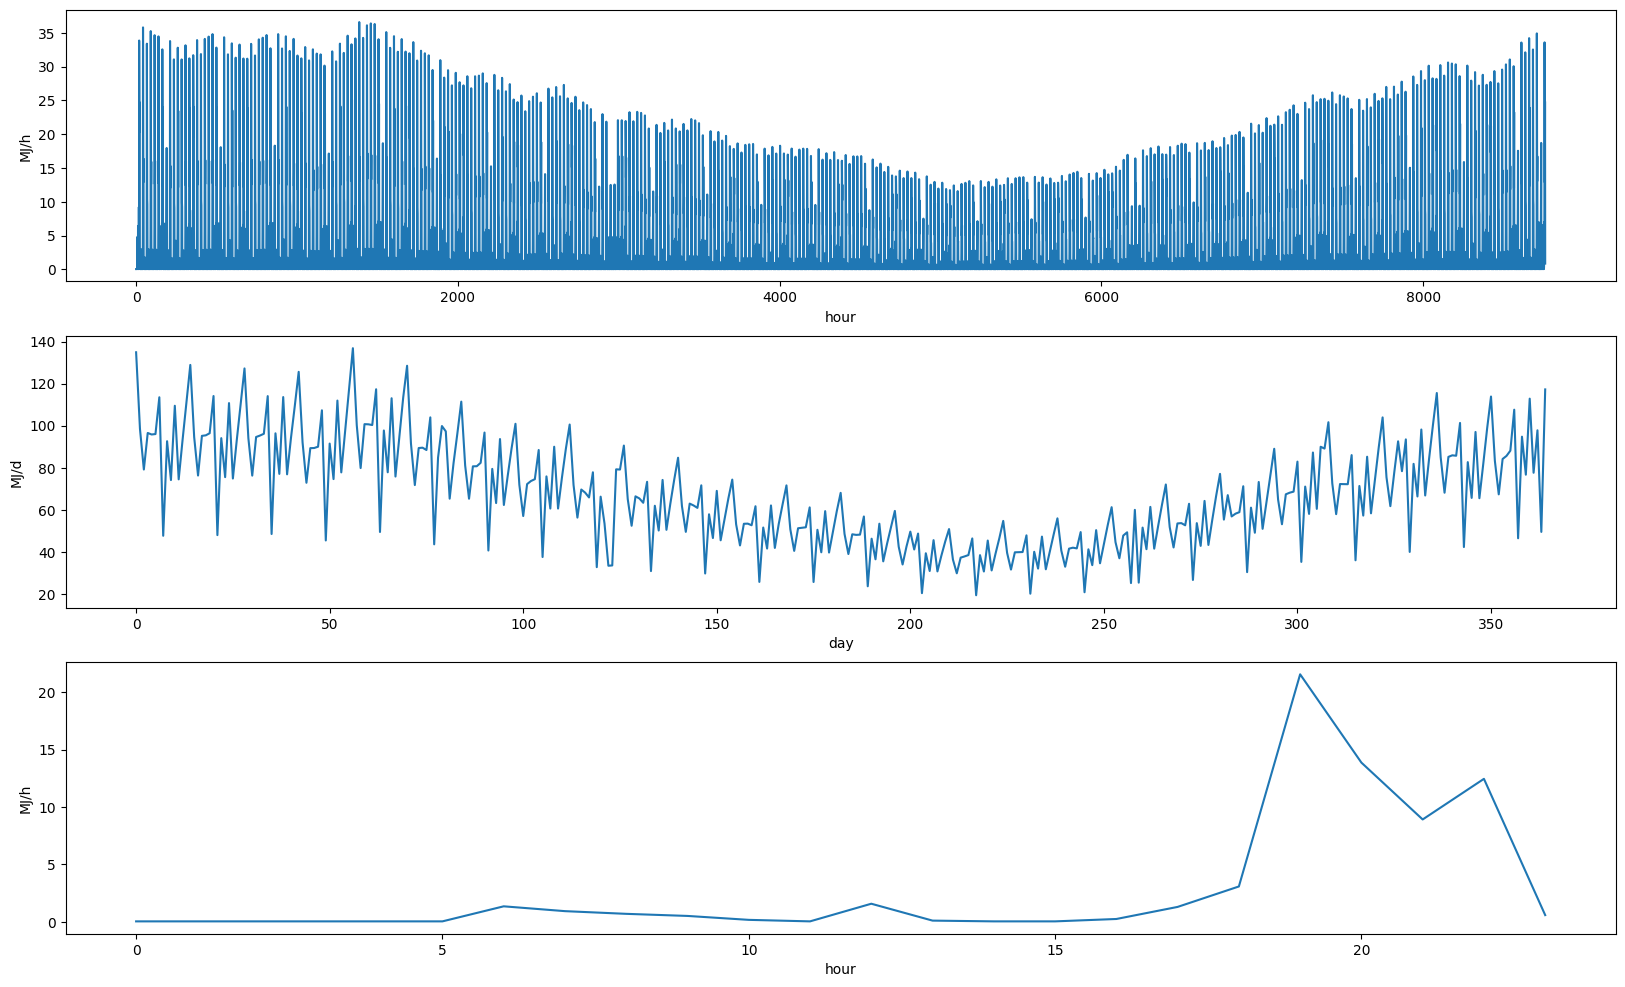

In [12]:
get_each_graph(E_W_d_t_4)

### 計算条件5

- 石油潜熱回収型給湯機（効率81.9%）に変更

In [13]:
base, HW = get_default_hot_water_demand()
HW['hw_type'] = '石油潜熱回収型給湯機'
HW['e_rtd'] = 0.819

E_W_d_t_5 = calc_results(base, HW)['Ene_TOTAL']

給湯用一次エネルギー消費量 = 23632.18030727068MJ/年


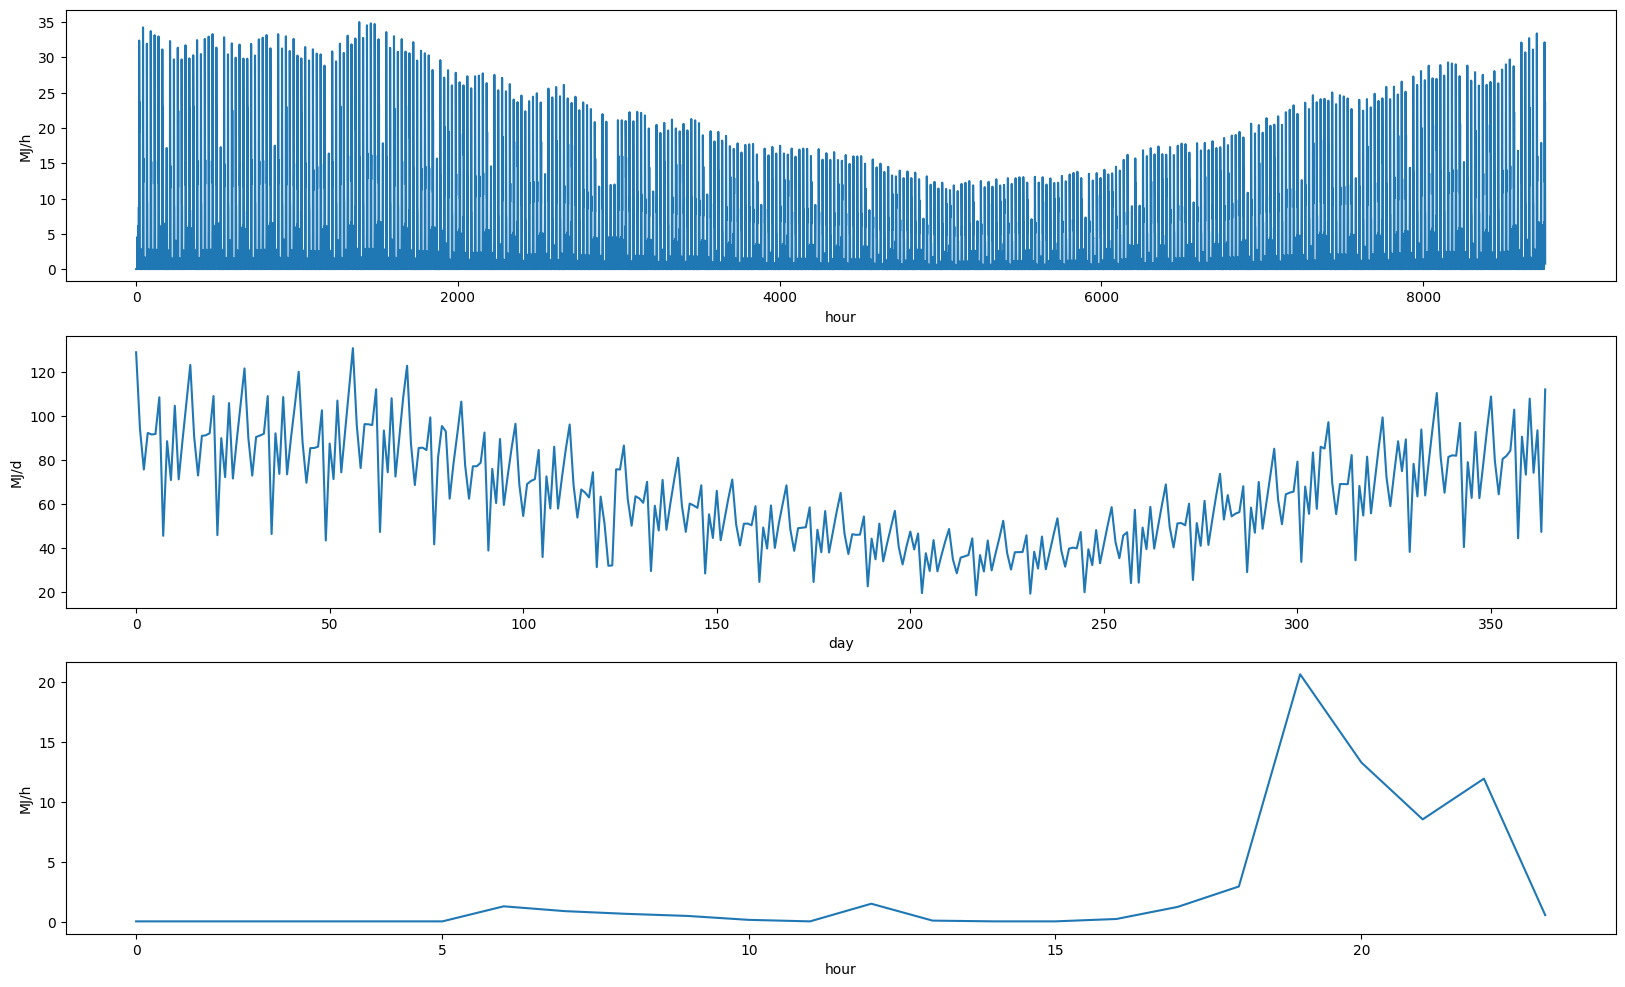

In [14]:
get_each_graph(E_W_d_t_5)

### 計算条件6

- 電気ヒーター給湯機に変更

In [15]:
base, HW = get_default_hot_water_demand()
HW['hw_type'] = '電気ヒーター給湯機'

E_W_d_t_6 = calc_results(base, HW)['Ene_TOTAL']

給湯用一次エネルギー消費量 = 59851.374867760234MJ/年


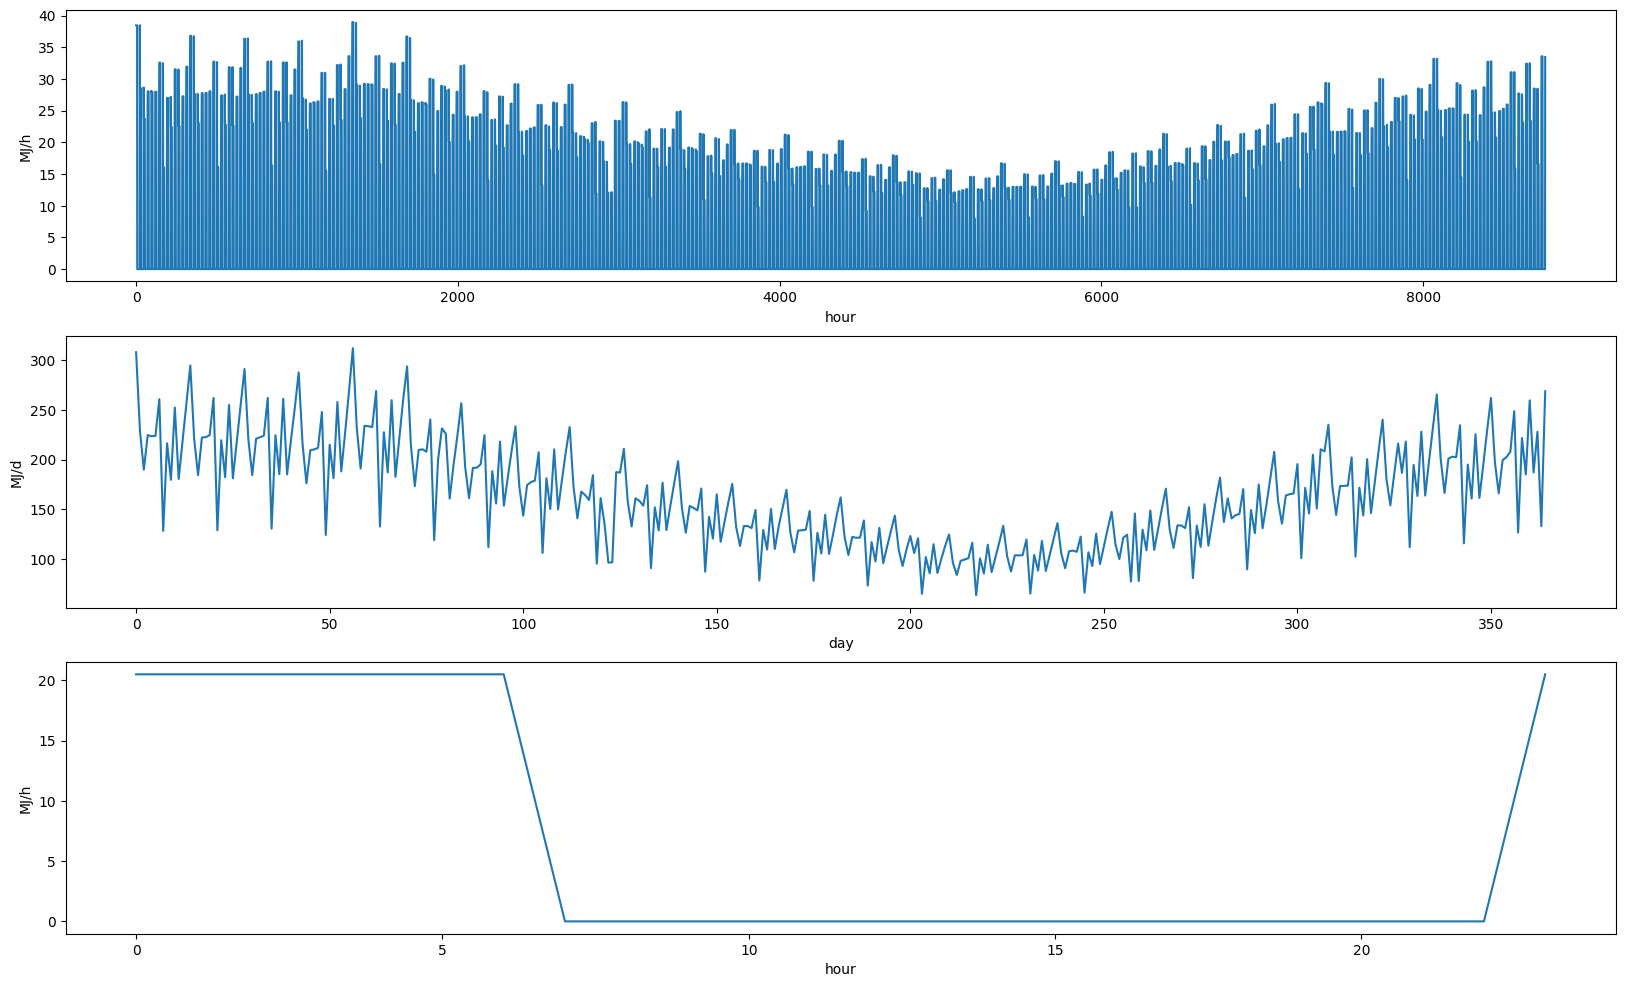

In [16]:
get_each_graph(E_W_d_t_6)

### 計算条件7

- 電気ヒートポンプ給湯機（JIS効率2.7）に変更

In [17]:
base, HW = get_default_hot_water_demand()
HW['hw_type'] = '電気ヒートポンプ給湯機'
HW['e_rtd'] = 2.7

E_W_d_t_7 = calc_results(base, HW)['Ene_TOTAL']

給湯用一次エネルギー消費量 = 20939.60349790317MJ/年


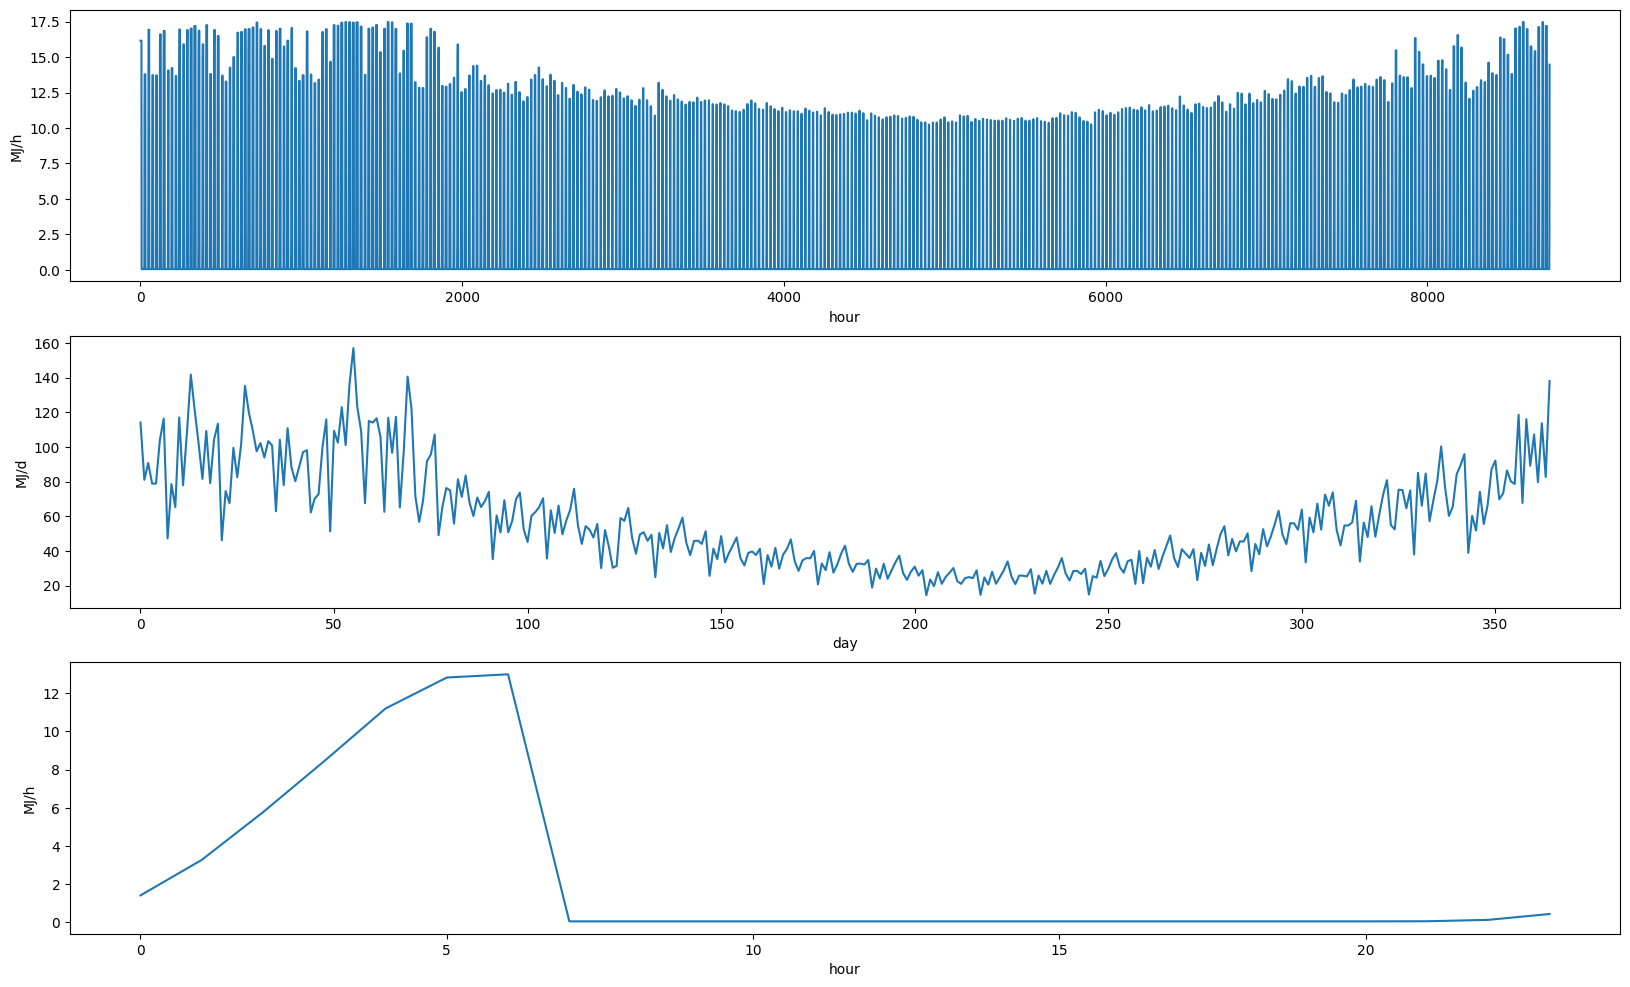

In [18]:
get_each_graph(E_W_d_t_7)

### 計算条件8

- 電気ヒートポンプ給湯機（品番を指定する）に変更
    - 製造事業者名			        株式会社コロナ
    - システム形式			        CHP-HXE37AY5
    - ヒートポンプユニット形式   CHP-YH454
    - 貯湯ユニット形式			    CTU-HXE37AY5
    - 発売予定年月日			      2022年06月01日

In [19]:
base, HW = get_default_hot_water_demand()
HW['hw_type'] = '電気ヒートポンプ給湯機'
HW['CO2HP'] = {'P_HP_imd_std_test': 0.891, 'P_HP_sum_std_test': 0.822, 'P_HP_win_std_test': 0.966, 'q_HP_imd_std_test': 4.32, 'q_HP_sum_std_test': 4.31,
               'q_HP_win_std_test': 4.35, 'e_HP_def_high_test': 2.83, 'e_HP_frst_high_test': 3.10, 'theta_bw_frst_high_test': 88.7, 'theta_bw_sum_std_test': 63.7,
               'theta_bw_imd_std_test': 63.9, 'theta_bw_win_std_test': 64.3, 'A_p': 0.0094, 'B_p': 0.4448, 'P_aux_HP_on_test': 9, 'P_aux_HP_off_test': 2,
               'Q_loss_test': 7.0, 'R_tnk_test': 0.42, 'theta_hat_bw_win_cm1_test': 66, 'theta_hat_bw_win_cm2_test': 74
               }

E_W_d_t_8 = calc_results(base, HW)['Ene_TOTAL']

給湯用一次エネルギー消費量 = 15476.163621028001MJ/年


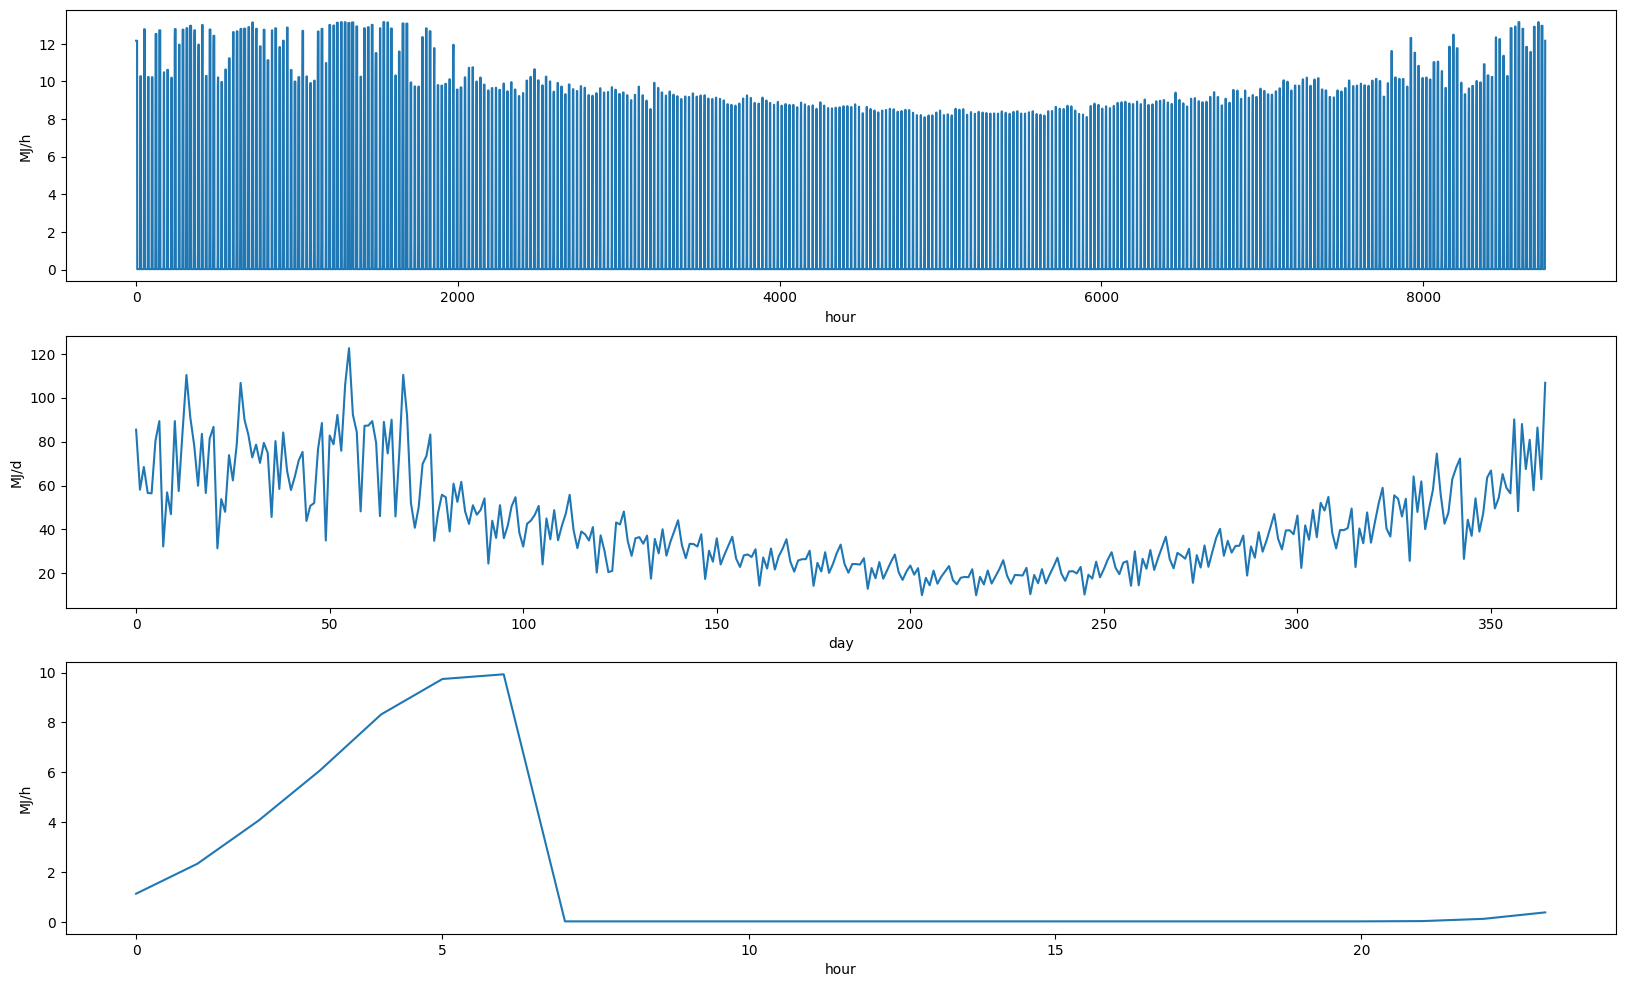

In [20]:
get_each_graph(E_W_d_t_8)

### 計算条件9

- 電気ヒートポンプ・ガス瞬間式併用型給湯機（区分1）に変更  

In [21]:
base, HW = get_default_hot_water_demand()
HW['hw_type'] = '電気ヒートポンプ・ガス併用型給湯機(仕様による)'
HW['hybrid_category'] = '区分1'

E_W_d_t_9 = calc_results(base, HW)['Ene_TOTAL']

給湯用一次エネルギー消費量 = 16298.021935129442MJ/年


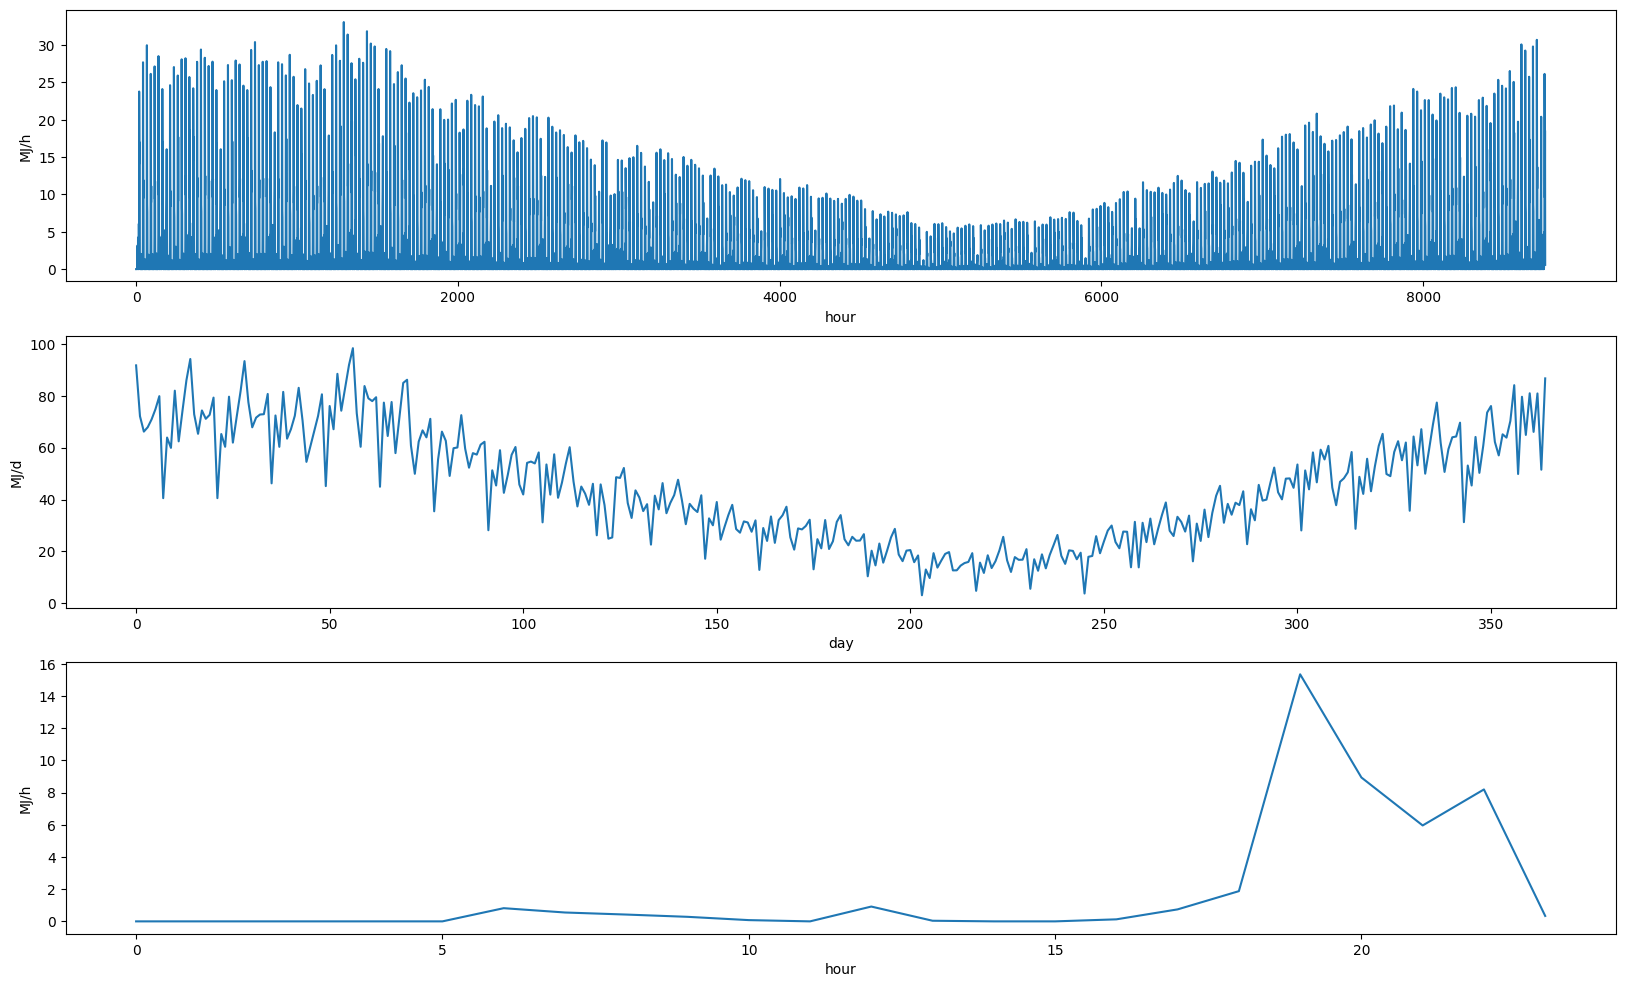

In [22]:
get_each_graph(E_W_d_t_9)

### 計算条件10

- 電気ヒートポンプ・ガス瞬間式併用型給湯機（品番を指定する）に変更
    - ブランド事業者名	リンナイ株式会社
    - ヒートポンプユニット番号	RHP-R225
    - 貯湯ユニット品番	RTU-R700K-PV
    - 補助熱源機品番	RHBF-RK246SAW
    - 成績証明書番号または自己適合宣言書番号	RIN2022-D001

In [23]:
base, HW = get_default_hot_water_demand()
HW['hw_type'] = '電気ヒートポンプ・ガス併用型給湯機(試験された値を用いる)'
HW['hybrid_param'] = {'a_HP': 0.6795, 'a_TU': 0.0007, 'b_HP': 12.8591, 'b_TU': 0.0322, 'e_HP_std_m7': 2.7606, 'e_HP_std_2': 3.2127,
                      'e_HP_std_7': 3.9185, 'e_HP_std_25': 5.6979, 'Q_HP_max': 194.4600, 'etr_loss_TU': 0.1716, 'Theta_ex_min_HP': -7.0000,
                      'e_BB_jis': 0.905, 'R_day':0.1645
                      }

E_W_d_t_10 = calc_results(base, HW)['Ene_TOTAL']

E_E_hs_HP = 1007.0728728209393
E_E_hs_TU = 23.385827380682084
E_E_hs_BB = 13.686551818865741
給湯用一次エネルギー消費量 = 16269.579294763975MJ/年


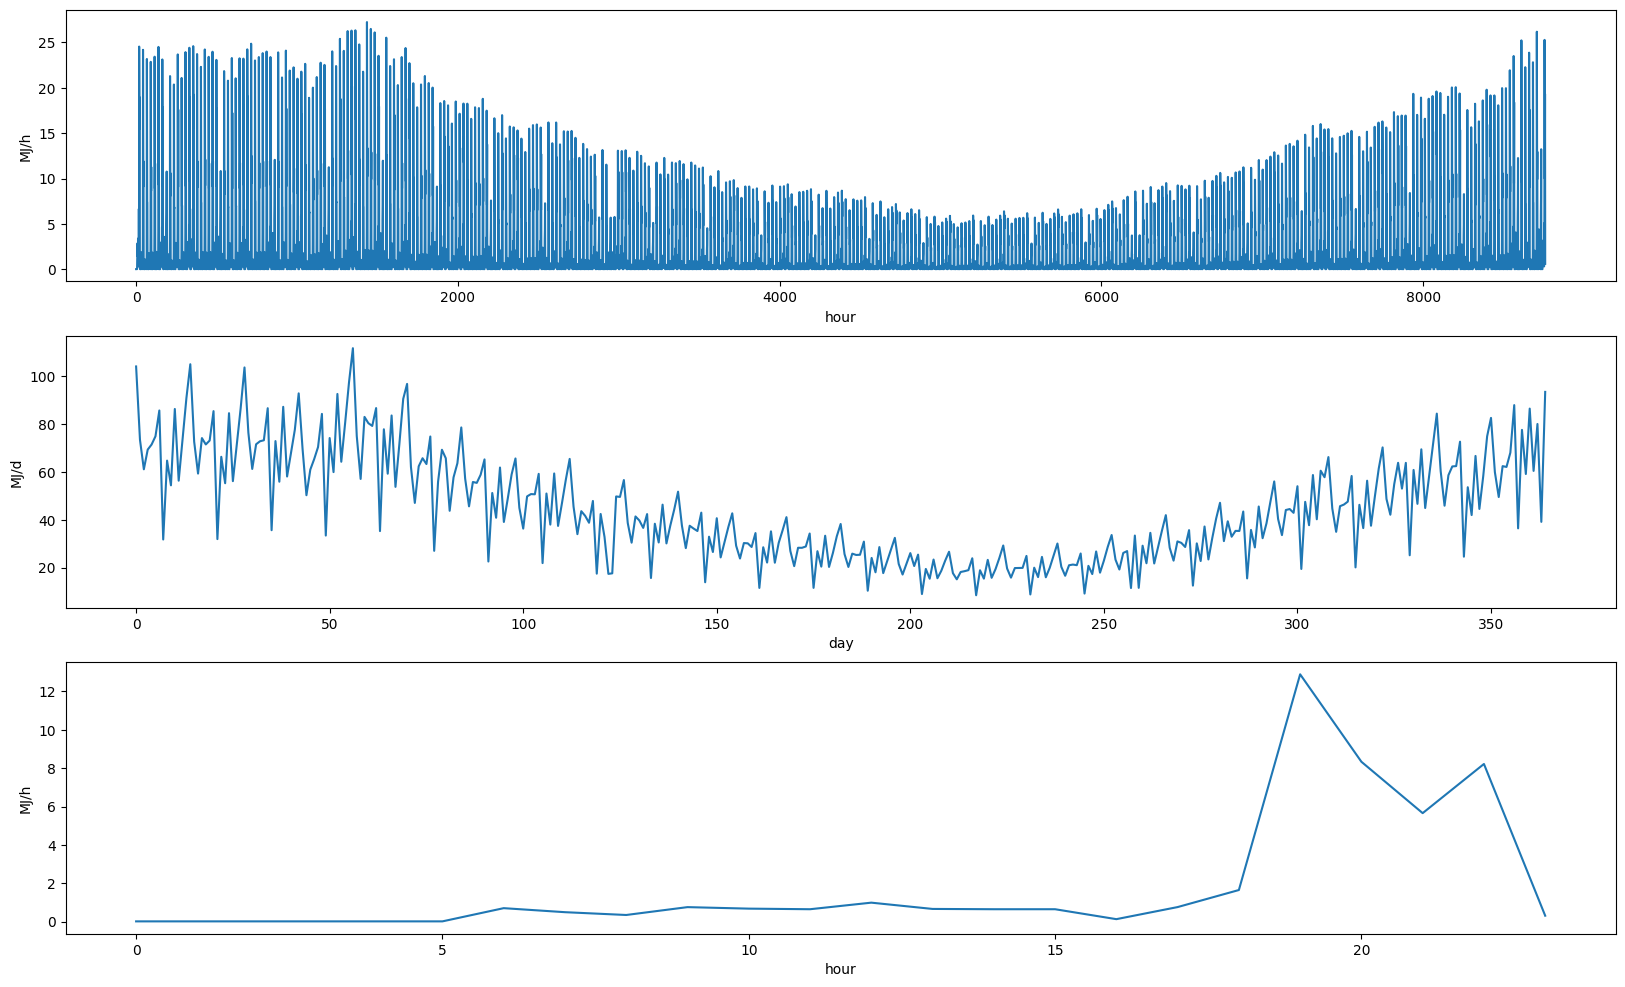

In [24]:
get_each_graph(E_W_d_t_10)

### 計算条件11

- 節湯水栓あり
- ヘッダー分岐後のすべての配管径が13A以下
- 高断熱浴槽を使用する

In [25]:
base, HW = get_default_hot_water_demand()
HW['pipe_diameter'] = 'ヘッダーにより台所水栓・シャワー水栓・洗面水栓に分岐され、かつ分岐後の配管すべての径が13A以下であるもの'
HW['kitchen_watersaving_A'] = True
HW['kitchen_watersaving_C'] = True
HW['shower_watersaving_A'] = True
HW['shower_watersaving_B'] = True
HW['washbowl_watersaving_C'] = True
HW['bath_insulation'] = True

E_W_d_t_11 = calc_results(base, HW)['Ene_TOTAL']

L_ba = 925.6601666666666
W_k = 35806.0
W_s = 58690.0
W_w = 9454.0
W_b1 = 0.0
W_b2 = 60300.0
W_ba1 = 0.0
W_dash_k = 27069.224
W_dash_s = 37913.73999999999
W_dash_w = 7852.699999999999
W_dash_b1 = 0.0
W_dash_b2 = 60300.0
W_dash_ba1 = 0.0
L_dash_k = 2857.6006320907904
L_dash_s = 3837.464839722722
L_dash_w = 829.4859898409763
L_dash_b1 = 0.0
L_dash_b2 = 6097.813467345601
L_dash_ba1 = 0.0
L_dash_ba2 = 1157.0752083333334
L_dashdash_k = 2857.6006320907904
L_dashdash_s = 3837.464839722722
L_dashdash_w = 829.4859898409763
L_dashdash_b1 = 0.0
L_dashdash_b2 = 6097.813467345601
L_dashdash_ba1 = 0.0
L_dashdash_ba2 = 1157.0752083333334
E_E_hs_aux1 = 33.82768429222222
E_E_hs_aux2 = 6.513888888888888
E_E_hs_aux3 = 11.213348844328705
給湯用一次エネルギー消費量 = 22479.398039947944MJ/年


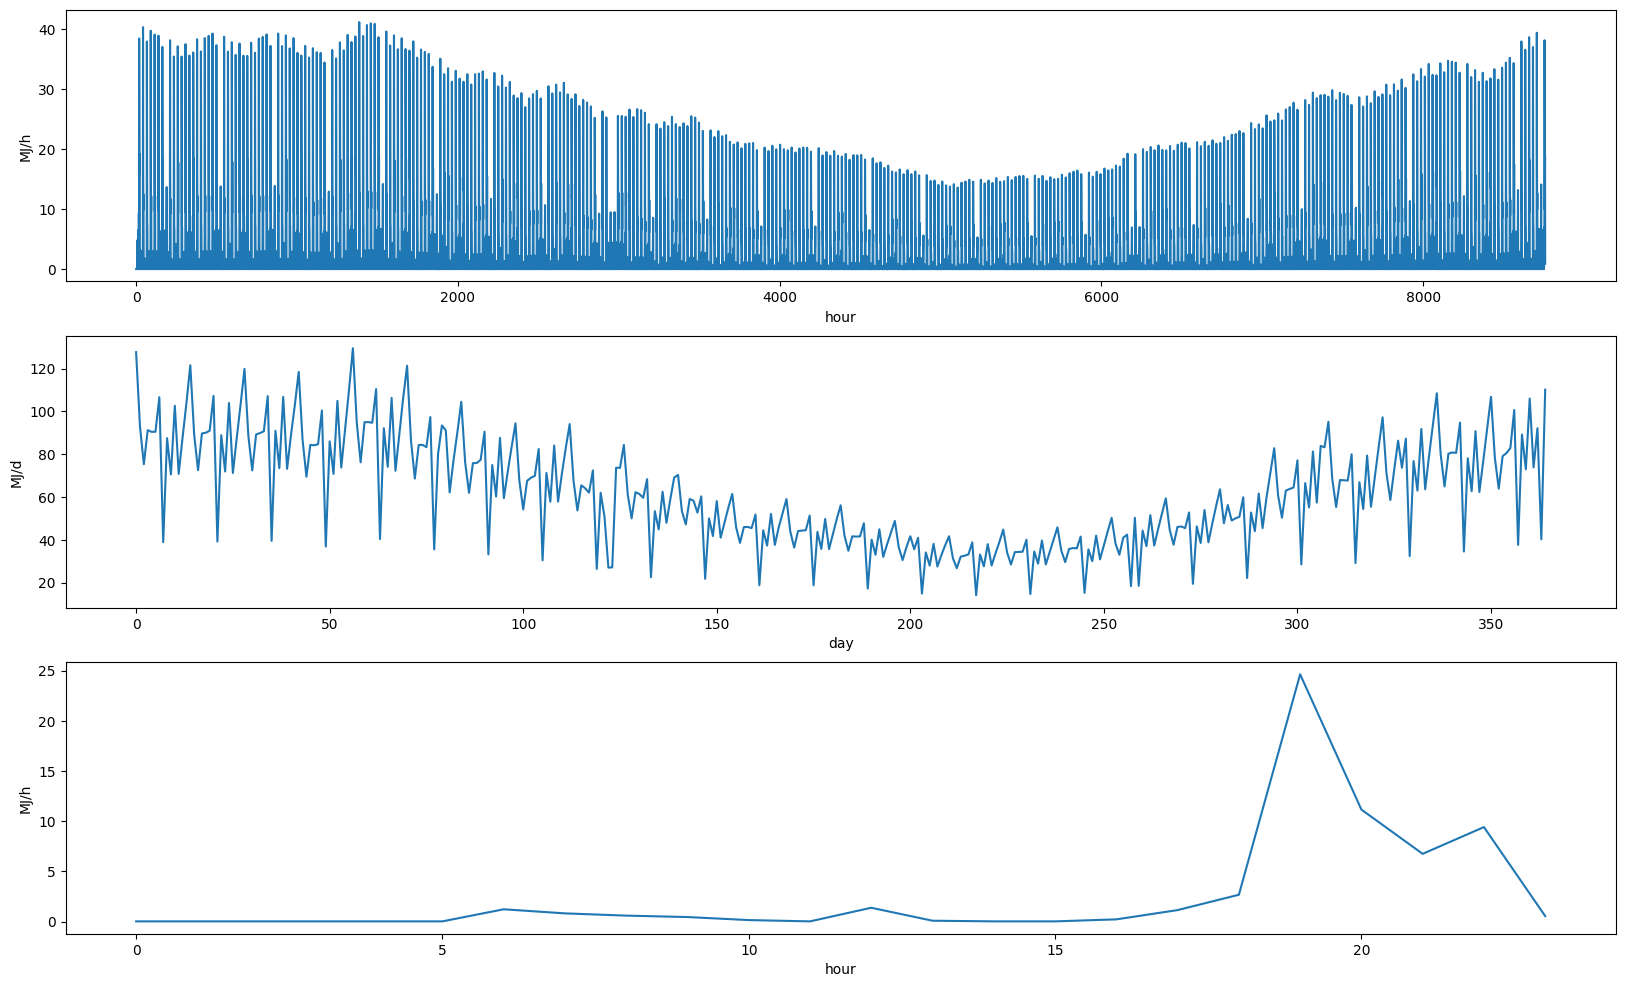

In [26]:
get_each_graph(E_W_d_t_11)

## 比較

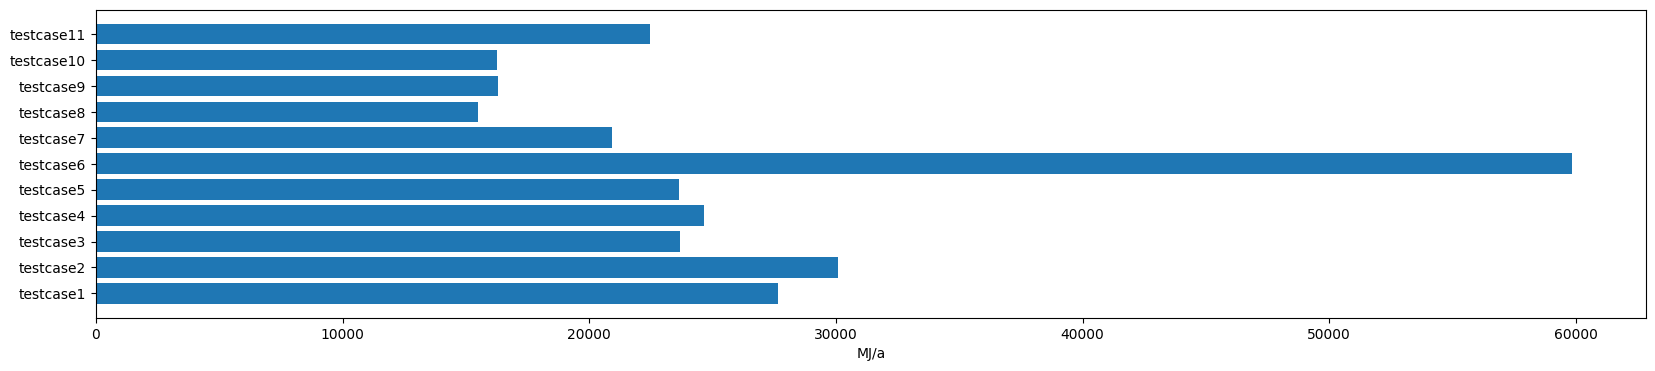

In [27]:
import matplotlib.pyplot as plt

dat = {"testcase1":sum(E_W_d_t_1),"testcase2" : sum(E_W_d_t_2), "testcase3" : sum(E_W_d_t_3), "testcase4" : sum(E_W_d_t_4), 
       "testcase5" : sum(E_W_d_t_5), "testcase6" : sum(E_W_d_t_6), "testcase7" : sum(E_W_d_t_7), "testcase8" : sum(E_W_d_t_8),
       "testcase9" : sum(E_W_d_t_9), "testcase10" : sum(E_W_d_t_10), "testcase11" : sum(E_W_d_t_11)}
xx = list(dat.keys())
yy = list(dat.values())

fig = plt.figure(figsize=(20,4))
axt = fig.add_subplot(111)
axt.barh(xx,yy)
axt.set_xlabel("MJ/a")
plt.show()
